In [75]:
#Health Data in Philadelphia Counties

In [76]:
##This health data set consists of quality of life, fair on poor health, health insurance, diabetes, food environment index, and physical environment variables. I will review the data, trim, and create maps.

In [77]:
###Author: Cassie Truong

In [78]:
#generating a library
import pandas as pd

In [79]:
#loading the data file which includes all counties in Pennsylvania 
df = pd.read_csv('data/R13285586_SL050.csv')

In [80]:
#generating a sample of the data
df. head()

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_NATION,Geo_STATE,Geo_COUNTY,SE_T001_001,SE_T001_002,SE_T002_001,SE_T003_001,...,SE_T013_001,SE_T016_001,SE_T016_002,SE_T016_003,SE_T016_004,SE_T016_005,SE_T016_006,SE_T016_007,SE_T016_008,SE_T016_009
0,42017,Bucks County,"Bucks County, Pennsylvania",0,42,17,3.255712,3.630721,12.354755,7.724081,...,8.8,10.1,Yes,14.941224,13.719828,1.126266,0.605957,81.965738,324560,43.4
1,42029,Chester County,"Chester County, Pennsylvania",0,42,29,3.504023,3.983571,13.008065,6.674396,...,8.7,10.4,Yes,14.460154,12.975760,1.253213,0.910454,79.040996,265442,42.8
2,42045,Delaware County,"Delaware County, Pennsylvania",0,42,45,3.805849,4.007199,15.294497,8.870670,...,8.2,11.9,No,17.049752,15.594348,1.330976,0.788272,73.149818,270095,46.9
3,42091,Montgomery County,"Montgomery County, Pennsylvania",0,42,91,3.187519,3.925691,11.759540,7.392164,...,8.7,9.2,Yes,14.761928,13.465608,1.121384,0.850315,78.658525,423832,44.8
4,42101,Philadelphia County,"Philadelphia County, Pennsylvania",0,42,101,4.636788,4.782447,21.655494,10.697246,...,6.9,11.2,No,23.432230,21.606609,2.533492,0.950918,50.913225,671083,53.7


In [81]:
#looking at the types of data that are in the set
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Geo_FIPS      5 non-null      int64  
 1   Geo_NAME      5 non-null      object 
 2   Geo_QNAME     5 non-null      object 
 3   Geo_NATION    5 non-null      int64  
 4   Geo_STATE     5 non-null      int64  
 5   Geo_COUNTY    5 non-null      int64  
 6   SE_T001_001   5 non-null      float64
 7   SE_T001_002   5 non-null      float64
 8   SE_T002_001   5 non-null      float64
 9   SE_T003_001   5 non-null      float64
 10  SE_T004_001   5 non-null      int64  
 11  SE_T004_002   5 non-null      int64  
 12  SE_T004_003   5 non-null      int64  
 13  SE_NV003_001  5 non-null      float64
 14  SE_NV003_002  5 non-null      float64
 15  SE_NV003_003  5 non-null      float64
 16  SE_T006_001   5 non-null      float64
 17  SE_T006_003   5 non-null      float64
 18  SE_NV005_001  5 non-null      int6

In [82]:
#From the data set above, I'm going to reimport the following from an integer to a string: FIPS, STATE, COUNTY

In [83]:
#reimporting data as a string
df = pd.read_csv(
    'data/R13285586_SL050.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY':str,
    }
)

In [84]:
#checking if the data's been converted
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Geo_FIPS      5 non-null      object 
 1   Geo_NAME      5 non-null      object 
 2   Geo_QNAME     5 non-null      object 
 3   Geo_NATION    5 non-null      int64  
 4   Geo_STATE     5 non-null      object 
 5   Geo_COUNTY    5 non-null      object 
 6   SE_T001_001   5 non-null      float64
 7   SE_T001_002   5 non-null      float64
 8   SE_T002_001   5 non-null      float64
 9   SE_T003_001   5 non-null      float64
 10  SE_T004_001   5 non-null      int64  
 11  SE_T004_002   5 non-null      int64  
 12  SE_T004_003   5 non-null      int64  
 13  SE_NV003_001  5 non-null      float64
 14  SE_NV003_002  5 non-null      float64
 15  SE_NV003_003  5 non-null      float64
 16  SE_T006_001   5 non-null      float64
 17  SE_T006_003   5 non-null      float64
 18  SE_NV005_001  5 non-null      int6

In [85]:
df.sample(5)

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_NATION,Geo_STATE,Geo_COUNTY,SE_T001_001,SE_T001_002,SE_T002_001,SE_T003_001,...,SE_T013_001,SE_T016_001,SE_T016_002,SE_T016_003,SE_T016_004,SE_T016_005,SE_T016_006,SE_T016_007,SE_T016_008,SE_T016_009
2,42045,Delaware County,"Delaware County, Pennsylvania",0,42,045,3.805849,4.007199,15.294497,8.870670,...,8.2,11.9,No,17.049752,15.594348,1.330976,0.788272,73.149818,270095,46.9
3,42091,Montgomery County,"Montgomery County, Pennsylvania",0,42,091,3.187519,3.925691,11.759540,7.392164,...,8.7,9.2,Yes,14.761928,13.465608,1.121384,0.850315,78.658525,423832,44.8
4,42101,Philadelphia County,"Philadelphia County, Pennsylvania",0,42,101,4.636788,4.782447,21.655494,10.697246,...,6.9,11.2,No,23.432230,21.606609,2.533492,0.950918,50.913225,671083,53.7
1,42029,Chester County,"Chester County, Pennsylvania",0,42,029,3.504023,3.983571,13.008065,6.674396,...,8.7,10.4,Yes,14.460154,12.975760,1.253213,0.910454,79.040996,265442,42.8
0,42017,Bucks County,"Bucks County, Pennsylvania",0,42,017,3.255712,3.630721,12.354755,7.724081,...,8.8,10.1,Yes,14.941224,13.719828,1.126266,0.605957,81.965738,324560,43.4


In [86]:
#reviewing which column has no code
df.columns[df.isna().all()].tolist()

['SE_NV007_001', 'SE_T010_003', 'SE_NV008_003']

In [87]:
#dropping the columns with no code
df = df.dropna(axis=1,how="all")

In [88]:
#confirming the column has been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 50 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Geo_FIPS      5 non-null      object 
 1   Geo_NAME      5 non-null      object 
 2   Geo_QNAME     5 non-null      object 
 3   Geo_NATION    5 non-null      int64  
 4   Geo_STATE     5 non-null      object 
 5   Geo_COUNTY    5 non-null      object 
 6   SE_T001_001   5 non-null      float64
 7   SE_T001_002   5 non-null      float64
 8   SE_T002_001   5 non-null      float64
 9   SE_T003_001   5 non-null      float64
 10  SE_T004_001   5 non-null      int64  
 11  SE_T004_002   5 non-null      int64  
 12  SE_T004_003   5 non-null      int64  
 13  SE_NV003_001  5 non-null      float64
 14  SE_NV003_002  5 non-null      float64
 15  SE_NV003_003  5 non-null      float64
 16  SE_T006_001   5 non-null      float64
 17  SE_T006_003   5 non-null      float64
 18  SE_NV005_001  5 non-null      int6

In [89]:
#refining my columns more by keeping the below:
- FIPS: FIPS
- NAME: Name of Area
- T013_001: Food Environment Index
- T001_001: Physically Unhealthy Days per Month (Persons 18 Years and Over)
- T001_002: Mentally Unhealthy Days per Month (Persons 18 Years and Over)
- T016_001: Air Pollution Particulate Matter Average Daily Pm2.5

SyntaxError: illegal target for annotation (3536904036.py, line 2)

In [90]:
#creating a new variable to keep the aforementioned columns
columns_to_keep = ['Geo_FIPS',
                   'Geo_QNAME',
                   'SE_T013_001',
                   'SE_T001_001',
                   'SE_T001_002',
                   'SE_T016_001']

In [91]:
df2 = df[columns_to_keep]

In [92]:
#confirming data
df2.sample(5)

,Geo_FIPS,Geo_QNAME,SE_T013_001,SE_T001_001,SE_T001_002,SE_T016_001
0,42017,"Bucks County, Pennsylvania",8.8,3.255712,3.630721,10.1
2,42045,"Delaware County, Pennsylvania",8.2,3.805849,4.007199,11.9
4,42101,"Philadelphia County, Pennsylvania",6.9,4.636788,4.782447,11.2
3,42091,"Montgomery County, Pennsylvania",8.7,3.187519,3.925691,9.2
1,42029,"Chester County, Pennsylvania",8.7,3.504023,3.983571,10.4


In [93]:
#renaming columns by first creating a list of current naming conventions
columns = list(df2)
columns

['Geo_FIPS',
 'Geo_QNAME',
 'SE_T013_001',
 'SE_T001_001',
 'SE_T001_002',
 'SE_T016_001']

In [94]:
#keeping the same sequence, now renaming the columns
df2.columns = ['FIPS',
               'County',
               'Food Env Index',
               'Physically Unhealthy Days/Month',
               'Mentally Unhealthy Days/Month',
               'Air Pollution Particulate Matter Avg. Daily PM 2.5'
              ]

In [95]:
#confirming renamed columns
df2.sample()

,FIPS,County,Food Env Index,Physically Unhealthy Days/Month,Mentally Unhealthy Days/Month,Air Pollution Particulate Matter Avg. Daily PM 2.5
4,42101,"Philadelphia County, Pennsylvania",6.9,4.636788,4.782447,11.2


In [96]:
df2.sample(5)

,FIPS,County,Food Env Index,Physically Unhealthy Days/Month,Mentally Unhealthy Days/Month,Air Pollution Particulate Matter Avg. Daily PM 2.5
3,42091,"Montgomery County, Pennsylvania",8.7,3.187519,3.925691,9.2
4,42101,"Philadelphia County, Pennsylvania",6.9,4.636788,4.782447,11.2
1,42029,"Chester County, Pennsylvania",8.7,3.504023,3.983571,10.4
0,42017,"Bucks County, Pennsylvania",8.8,3.255712,3.630721,10.1
2,42045,"Delaware County, Pennsylvania",8.2,3.805849,4.007199,11.9


In [97]:
#analyzing statistics of Food Environment Index, which ranges from 0 (worst ) to 10 (best) and equally weighs two incidators of the environment: limited access to healthy foods and food insecurity. 
df2['Food Env Index'].describe()

count    5.000000
mean     8.260000
std      0.795613
min      6.900000
25%      8.200000
50%      8.700000
75%      8.700000
max      8.800000
Name: Food Env Index, dtype: float64

In [98]:
df2['Food Env Index'].median()

8.7

In [99]:
df2['Air Pollution Particulate Matter Avg. Daily PM 2.5'].describe()

count     5.000000
mean     10.560000
std       1.035857
min       9.200000
25%      10.100000
50%      10.400000
75%      11.200000
max      11.900000
Name: Air Pollution Particulate Matter Avg. Daily PM 2.5, dtype: float64

In [100]:
#This category of data shows the average Daily PM for the county. It looks like PM is higher than 2.5, with the lowest being 8.5 and highest being 13.3. 

In [101]:
#generating statistics for physically unhealthy days per month.
df2['Physically Unhealthy Days/Month'].describe()

count    5.000000
mean     3.677978
std      0.588385
min      3.187519
25%      3.255712
50%      3.504023
75%      3.805849
max      4.636788
Name: Physically Unhealthy Days/Month, dtype: float64

In [102]:
#generating statistics for mentally unhealthy days per month.
df2['Mentally Unhealthy Days/Month'].describe()

count    5.000000
mean     4.065926
std      0.427990
min      3.630721
25%      3.925691
50%      3.983571
75%      4.007199
max      4.782447
Name: Mentally Unhealthy Days/Month, dtype: float64

<AxesSubplot: xlabel='Physically Unhealthy Days/Month', ylabel='Air Pollution Particulate Matter Avg. Daily PM 2.5'>

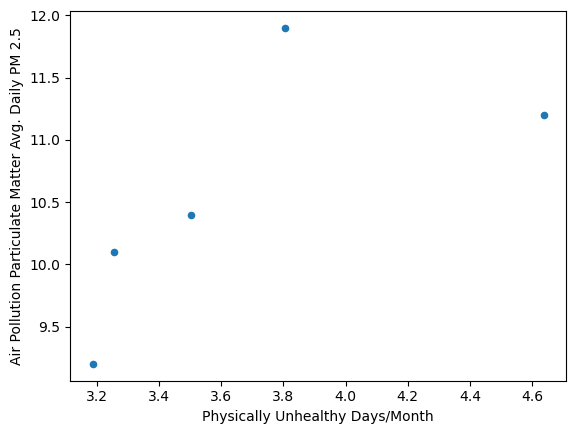

In [103]:
#generating a scatter plot looking at physically unhealthy days/month against air pollution particulate matter.
df2.plot.scatter(x='Physically Unhealthy Days/Month', y='Air Pollution Particulate Matter Avg. Daily PM 2.5')

<AxesSubplot: xlabel='Mentally Unhealthy Days/Month', ylabel='Air Pollution Particulate Matter Avg. Daily PM 2.5'>

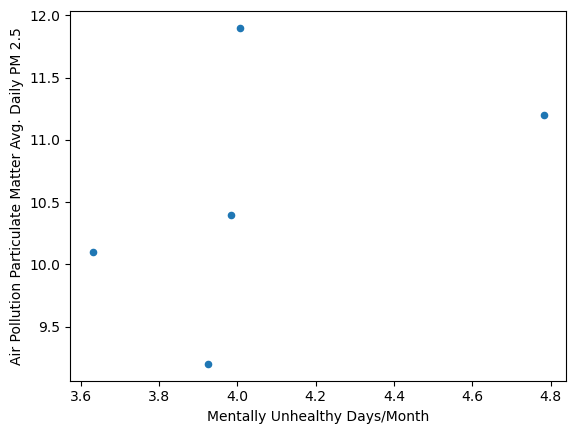

In [104]:
#generating a scatter plot looking at mentally unhealthy days/month against air pollution particulate matter.
df2.plot.scatter(x='Mentally Unhealthy Days/Month', y='Air Pollution Particulate Matter Avg. Daily PM 2.5')

In [105]:
#Scatter plots are not quite useful to visualize this data set because we're only looking at five counties. 

In [106]:
df2_foodenvsorted 

,FIPS,County,Food Env Index,Physically Unhealthy Days/Month,Mentally Unhealthy Days/Month,Air Pollution Particulate Matter Avg. Daily PM 2.5
4,42101,"Philadelphia County, Pennsylvania",6.9,4.636788,4.782447,11.2
2,42045,"Delaware County, Pennsylvania",8.2,3.805849,4.007199,11.9
1,42029,"Chester County, Pennsylvania",8.7,3.504023,3.983571,10.4
3,42091,"Montgomery County, Pennsylvania",8.7,3.187519,3.925691,9.2
0,42017,"Bucks County, Pennsylvania",8.8,3.255712,3.630721,10.1


<AxesSubplot: title={'center': 'Counties in Philadelphia with Highest Access to Healthy Foods '}, ylabel='County'>

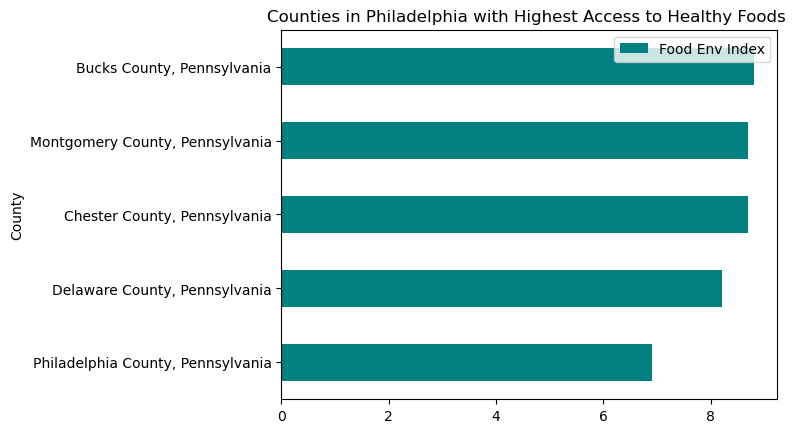

In [107]:
#creating a horizontal bar graph with the first ten rows of the sorted data
df2_foodenvsorted.head(10).plot.barh(x='County',
                                        y='Food Env Index',
                                        title= 'Counties in Philadelphia with Highest Access to Healthy Foods ',
                                        color= 'teal')

In [108]:
#Creating a map (hopefully)

In [109]:
import geopandas as gpd

In [168]:
#pulling in geoson file download from open data Philadelphia
tracts=gpd.read_file('data/Census_Tracts_2010.geojson')
tracts.tail()

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LOGRECNO,geometry
379,380,42,101,037200,42101037200,372,Census Tract 372,G5020,S,1028984,0,+39.9129487,-075.1599379,10690,"POLYGON ((-75.17135 39.91678, -75.17143 39.916..."
380,381,42,101,038300,42101038300,383,Census Tract 383,G5020,S,3064496,0,+40.0108630,-075.1248984,10700,"POLYGON ((-75.11627 40.01743, -75.11660 40.017..."
381,382,42,101,039000,42101039000,390,Census Tract 390,G5020,S,2032689,0,+40.0357300,-075.0938840,10707,"POLYGON ((-75.08824 40.04034, -75.08820 40.040..."
382,383,42,101,037800,42101037800,378,Census Tract 378,G5020,S,3760084,1936838,+39.9805802,-075.0956845,10695,"POLYGON ((-75.11051 39.96952, -75.10676 39.970..."
383,384,42,101,037700,42101037700,377,Census Tract 377,G5020,S,736894,0,+39.9824381,-075.1506932,10694,"POLYGON ((-75.15170 39.98571, -75.15249 39.985..."


<AxesSubplot: >

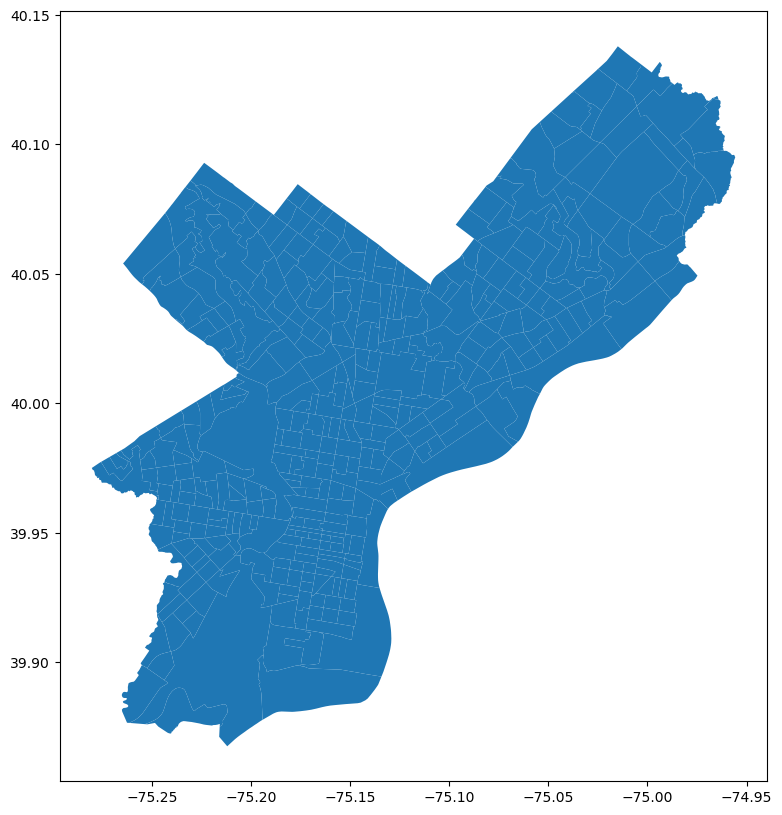

In [169]:
#now plotting it
tracts.plot(figsize=(14,10))

In [170]:
#better understanding what kind of data this map is comprised of
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    384 non-null    int64   
 1   STATEFP10   384 non-null    object  
 2   COUNTYFP10  384 non-null    object  
 3   TRACTCE10   384 non-null    object  
 4   GEOID10     384 non-null    object  
 5   NAME10      384 non-null    object  
 6   NAMELSAD10  384 non-null    object  
 7   MTFCC10     384 non-null    object  
 8   FUNCSTAT10  384 non-null    object  
 9   ALAND10     384 non-null    int64   
 10  AWATER10    384 non-null    int64   
 11  INTPTLAT10  384 non-null    object  
 12  INTPTLON10  384 non-null    object  
 13  LOGRECNO    384 non-null    object  
 14  geometry    384 non-null    geometry
dtypes: geometry(1), int64(3), object(11)
memory usage: 45.1+ KB


In [171]:
#subsetting FIPS and Geometry
tracts= tracts[['TRACTCE10','geometry']]
tracts.head()

,TRACTCE10,geometry
0,009400,"POLYGON ((-75.22927 39.96054, -75.22865 39.960..."
1,009500,"POLYGON ((-75.23536 39.96852, -75.23545 39.969..."
2,009600,"POLYGON ((-75.24343 39.96230, -75.24339 39.962..."
3,013800,"POLYGON ((-75.17341 39.97779, -75.17386 39.977..."
4,013900,"POLYGON ((-75.17313 39.97776, -75.17321 39.977..."


In [177]:
#creating a FIPS column
tracts['FIPS'] = '42' + '017' + '029' + '045' + ' 091' + '101' tracts['TRACTCE10']

SyntaxError: invalid syntax (336098136.py, line 2)

In [178]:
#hoping this works
tracts.head()

,TRACTCE10,geometry,FIPS
0,009400,"POLYGON ((-75.22927 39.96054, -75.22865 39.960...",42009400
1,009500,"POLYGON ((-75.23536 39.96852, -75.23545 39.969...",42009500
2,009600,"POLYGON ((-75.24343 39.96230, -75.24339 39.962...",42009600
3,013800,"POLYGON ((-75.17341 39.97779, -75.17386 39.977...",42013800
4,013900,"POLYGON ((-75.17313 39.97776, -75.17321 39.977...",42013900


In [179]:
#creating a new dataframe that merges the two data sets
tracts_health=tracts.merge(df2,on="FIPS")

In [180]:
#confirming merge
tracts_health.head()

,TRACTCE10,geometry,FIPS,County,Food Env Index,Physically Unhealthy Days/Month,Mentally Unhealthy Days/Month,Air Pollution Particulate Matter Avg. Daily PM 2.5


In [176]:
+ '017' + '029' + '045' + ' 091' + '101' 

TypeError: bad operand type for unary +: 'str'